### **Estimación de calidad de vinos utilizando técnicas de machine learning**

Se utiliza un dataset que contiene información detallada sobre las características fisico-químicas del vino. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10. Mediante técnicas de machine learning se busca predecir la calidad de un vino dado.


Dataset disponible en: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

### **1. Importación de librerias y dataset**

In [4]:
# librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

In [5]:
# dataset
df = pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### **2. Análisis de los datos**

In [6]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# tipos de datos del dataframe
print("Los tipos de datos del dataframe son:")
print(df.dtypes)

Los tipos de datos del dataframe son:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [8]:
# shape
df.shape

(1599, 12)

In [9]:
# estadisticas del dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Identificación de valores faltantes, outliers y duplicados.

In [10]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1599,0,0.0
volatile acidity,1599,0,0.0
citric acid,1599,0,0.0
residual sugar,1599,0,0.0
chlorides,1599,0,0.0
free sulfur dioxide,1599,0,0.0
total sulfur dioxide,1599,0,0.0
density,1599,0,0.0
pH,1599,0,0.0
sulphates,1599,0,0.0


El dataset no cuenta con datos faltantes.

In [11]:
# valores duplicados
df.duplicated().sum()

240

A continuacion se visualiza la distribucion de las variables.

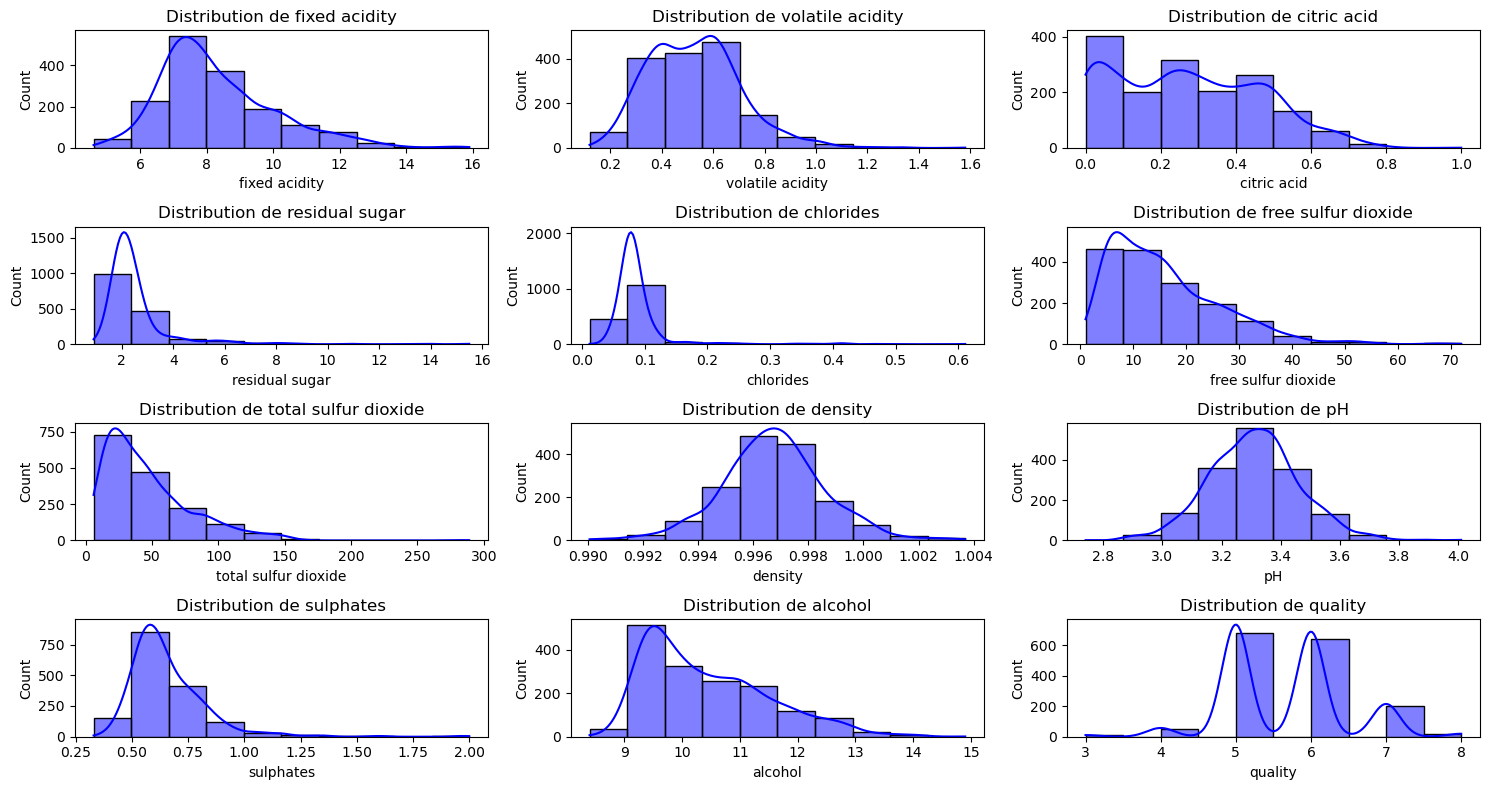

In [12]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()

plt.show()

Segun la distribucion de los datos en las columnas numericas algunas variables siguen una distribucion normal, como lo es el caso de la densidad y el ph, mientras que las demás variables se encuentran sesgadas a la derecha.

Se generan boxplots para las variables y asi identificar outliers.

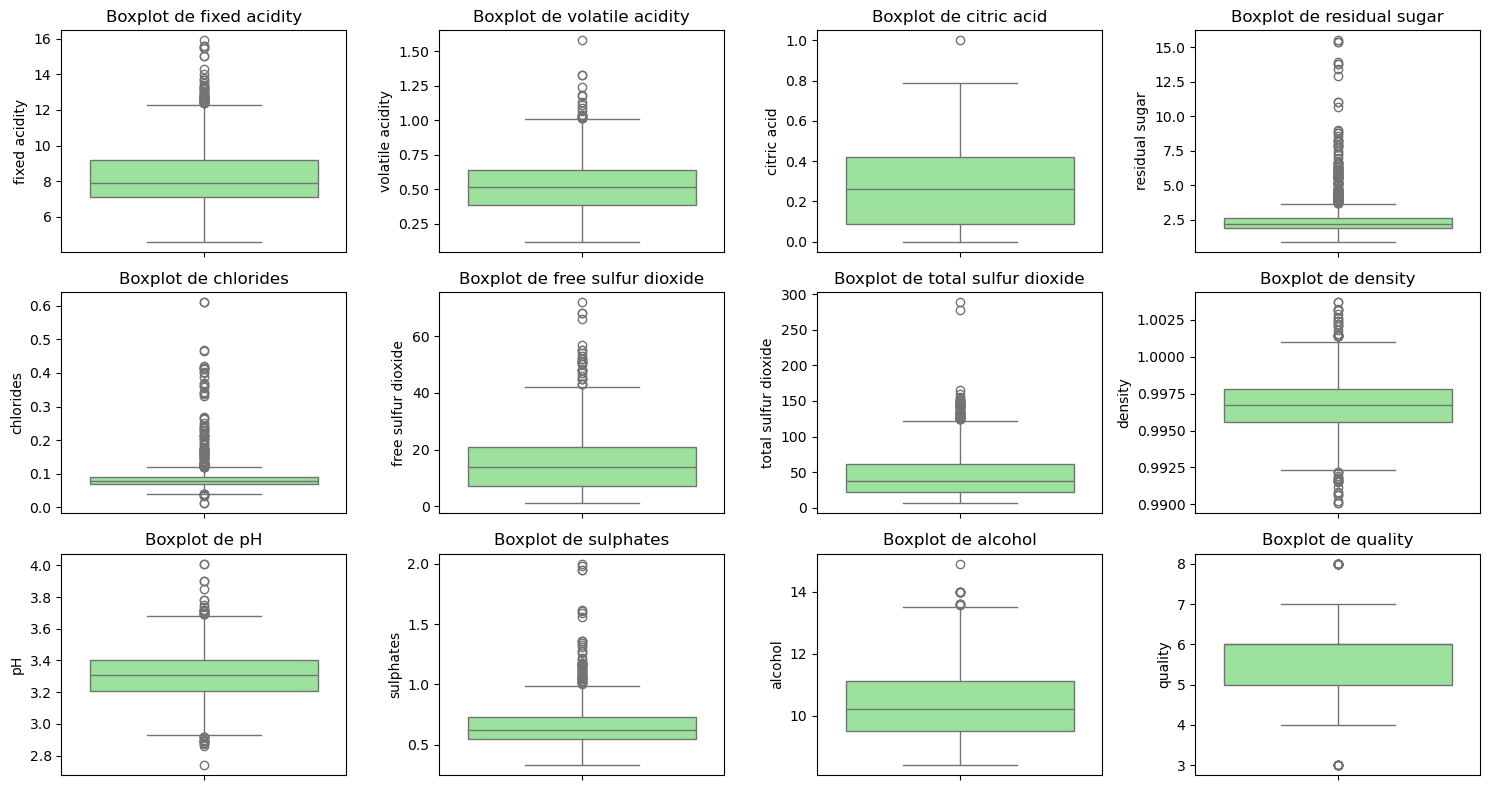

In [13]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i)  
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Se ve una gran cantidad de outliers en los datos. 

Se genera un mapa de calor para visualizar las correlaciones entre variables.

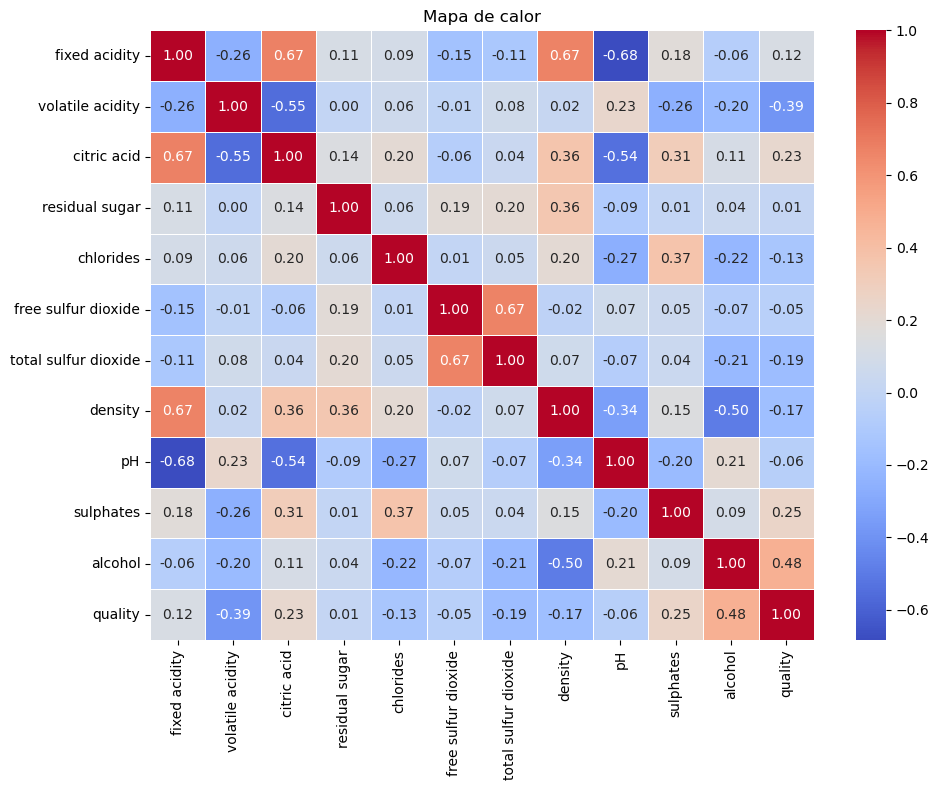

In [14]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor')
plt.tight_layout()
plt.show()

In [15]:
# categorias
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### **3. Preprocesamiento**

Se dividen los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%) y se realiza un preprocesamiento.

In [16]:
# definicion de variables categoricas y target
x = df.drop(columns=['quality'])
y = df[['quality']]

In [17]:
# verificacion 
print("Variables predictoras dimensiones" , x.shape)
print("Variable target dimensiones" , y.shape)

Variables predictoras dimensiones (1599, 11)
Variable target dimensiones (1599, 1)


Separar los datos en train y test 

In [18]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Se aplica el escalamiento a las variables.

In [19]:
# escalamiento de los datos
scaler = StandardScaler()

Se procesan las columnas aplicando el scaler.

In [20]:
# procesar las columnas
# fit transform para train
x_train = scaler.fit_transform(x_train)

# transform para test
x_test = scaler.transform(x_test)

### **4. Aplicación de modelos**

### **Modelo KNN Classifier**

Se aplica el modelo KNN para clasificación y se evaluan sus métricas.

In [19]:
# ajustar el modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.values.flatten())

KNeighborsClassifier(n_neighbors=3)

Se realizan predicciones con el modelo.

In [20]:
# realizar predicciones
y_pred = knn.predict(x_test)

Se evalua los resultados del modelo respecto a las metricas de clasificacion.

In [21]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.515625
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.67      0.63       130
           6       0.48      0.48      0.48       132
           7       0.48      0.36      0.41        42
           8       0.00      0.00      0.00         5

    accuracy                           0.52       320
   macro avg       0.26      0.25      0.25       320
weighted avg       0.51      0.52      0.51       320



In [22]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[ 0  0  0  1  0  0]
 [ 1  0  2  7  0  0]
 [ 0  4 87 38  1  0]
 [ 0  7 50 63 12  0]
 [ 0  0  7 19 15  1]
 [ 0  0  0  2  3  0]]


A continuacion se crea una funcion para graficar la matriz de confusion

In [23]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

In [24]:
# funcion para graficar la curva roc
def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2 , label=f'ROC curve (AUC = {roc_auc: .2f})')
    plt.plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
    plt.xlim([0.0,1.0])
    plt.xlim([0.0,1.05])
    plt.title(title)
    plt.ylabel('Tasa de falsos positivos')
    plt.xlabel('Tasa de verdaderos positivos')
    plt.legend(loc="lower right")
    plt.show()

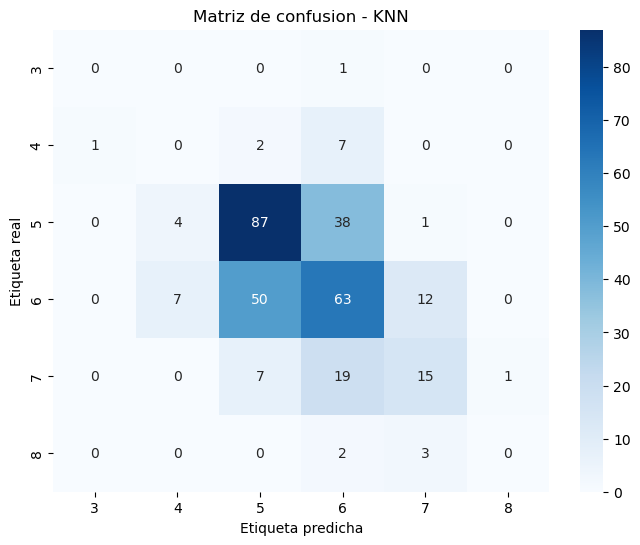

In [25]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - KNN")

In [26]:
# revisar la distribucion de clases
from collections import Counter

print("Distribución de clases en y_test:", Counter(y_test))
print("Distribución de clases en y_pred:", Counter(y_pred))

Distribución de clases en y_test: Counter({'quality': 1})
Distribución de clases en y_pred: Counter({5: 146, 6: 130, 7: 31, 4: 11, 8: 1, 3: 1})


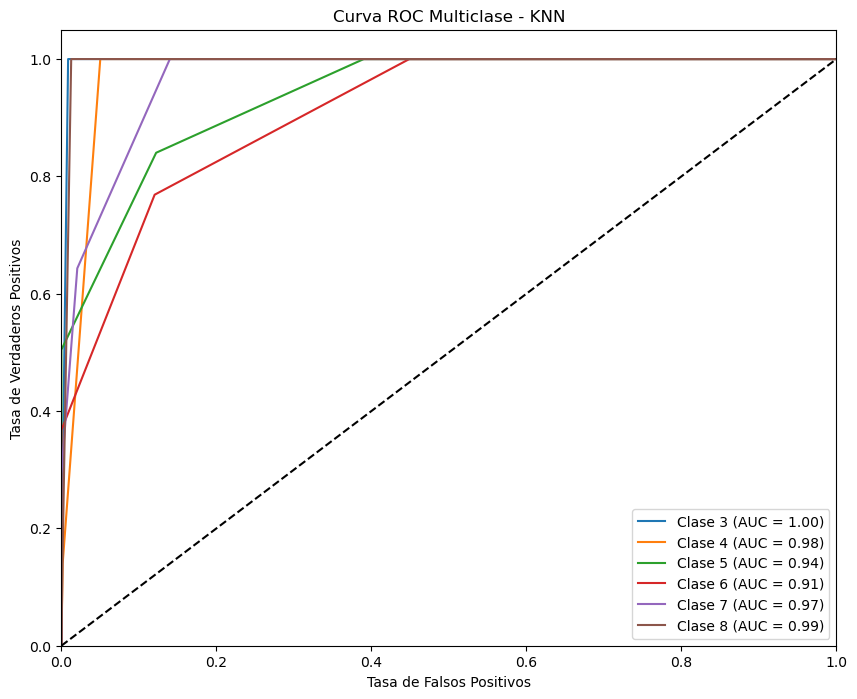

In [27]:
# curva roc para multiclase
# convertir a binario las etiquetas
y_train_bin = label_binarize(y_train, classes=classes) 
y_pred_prob = knn.predict_proba(x_train)

# graficar la curva 
plt.figure(figsize=(10, 8))

# curva roc para cada clase
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {classes[i]} (AUC = {roc_auc:.2f})')

# resultado
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase - KNN')
plt.legend(loc='lower right')
plt.show()

### **Modelo Decission trees Classifier**

Se adapta el flujo para aplicar arboles de decision para clasificacion

In [29]:
# ajustar modelo
tree_model = DecisionTreeClassifier(
    random_state=42, 
    max_depth=5,  # Limitar la profundidad del árbol
    min_samples_split=10,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=5  # Mínimo de muestras en las hojas
)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [30]:
# realizar predicciones
y_pred = tree_model.predict(x_test)

In [31]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.5625
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.77      0.67       130
           6       0.55      0.49      0.52       132
           7       0.45      0.36      0.40        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.27      0.27      0.27       320
weighted avg       0.53      0.56      0.54       320



c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [32]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[  0   0   1   0   0   0]
 [  0   0   8   1   1   0]
 [  0   1 100  27   2   0]
 [  0   0  54  65  13   0]
 [  0   0   5  22  15   0]
 [  0   0   0   3   2   0]]


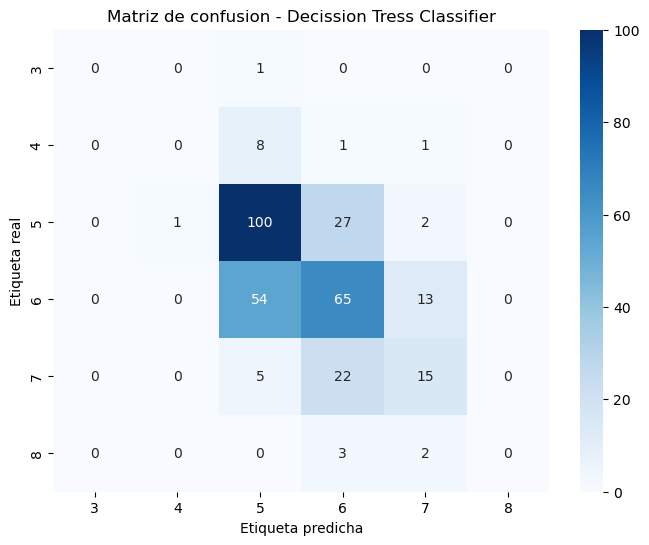

In [33]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Decission Tress Classifier")

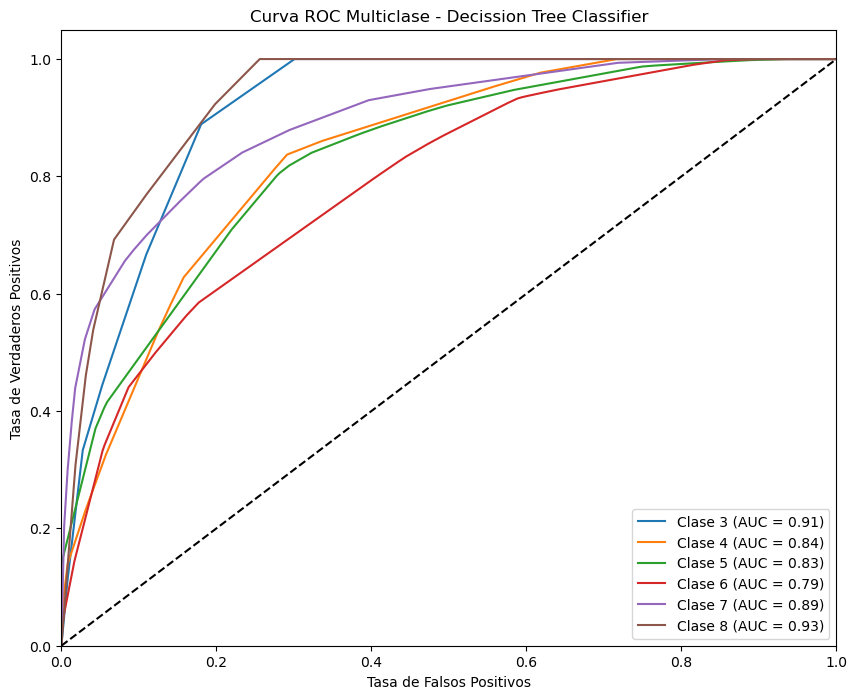

In [34]:
# curva roc para multiclase
# convertir a binario las etiquetas
y_train_bin = label_binarize(y_train, classes=classes) 
y_pred_prob = tree_model.predict_proba(x_train)

# graficar la curva 
plt.figure(figsize=(10, 8))

# curva roc para cada clase
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {classes[i]} (AUC = {roc_auc:.2f})')

# resultado
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase - Decission Tree Classifier')
plt.legend(loc='lower right')
plt.show()

### **Modelo Regresion logistica**

Se adapta el flujo para aplicar logistic regression

In [35]:
# ajustar modelo
lr_model = LogisticRegression(random_state=42) 
lr_model.fit(x_train, y_train.values.flatten())


LogisticRegression(random_state=42)

In [36]:
# realizar predicciones
y_pred = lr_model.predict(x_test)

In [37]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.575
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

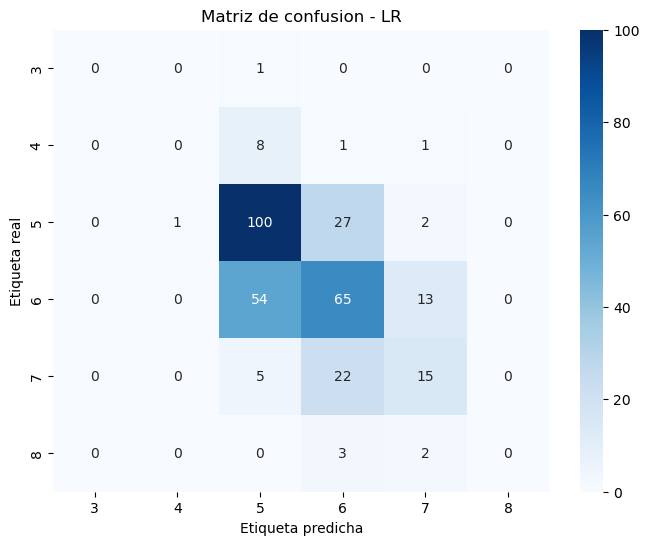

In [38]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - LR")

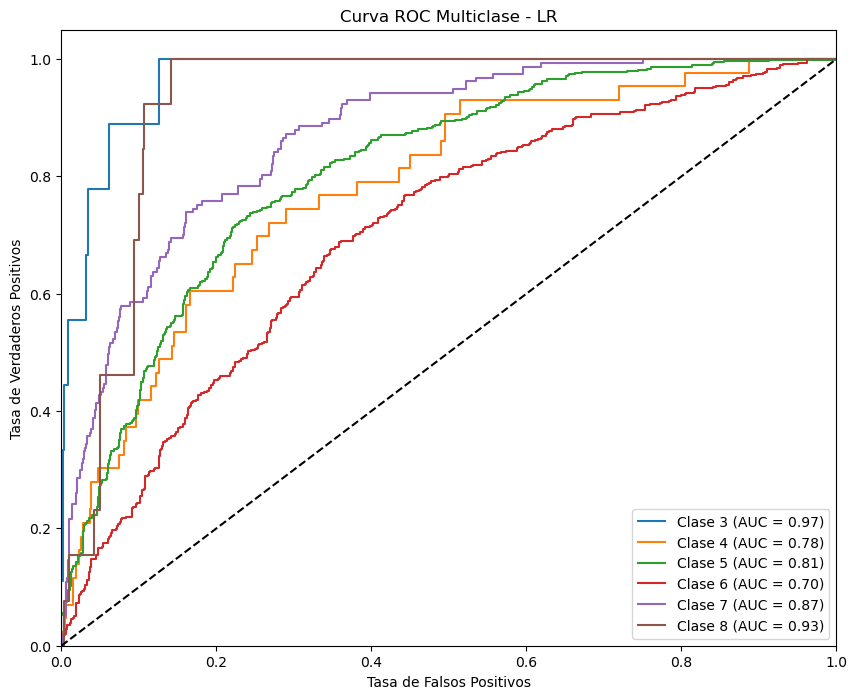

In [39]:
# curva roc para multiclase
# convertir a binario las etiquetas
y_train_bin = label_binarize(y_train, classes=classes) 
y_pred_prob = lr_model.predict_proba(x_train)

# graficar la curva 
plt.figure(figsize=(10, 8))

# curva roc para cada clase
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {classes[i]} (AUC = {roc_auc:.2f})')

# resultado
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase - LR')
plt.legend(loc='lower right')
plt.show()

El objetivo de este trabajo fue de el de realizar predicciones sobre la calidad del vino basado en sus caracteristicas, dicha prediccion se logra utilizando modelos de clasificacion de machine learning. Aqui se aplicaron los modelos KNN classifier, decission tress classifier y logistic regresion. Para cada modelo de grafico las curvas roc, la matriz de confusion y se calcularon metricas que ayuden a identificar que modelo tuvo un mejor desempeño.

En cuanto a exactitud, los 3 modelos tienen un desempeño similar, siendo ligeramente mejor la regresion logistica. Si se comparan las clases, se observa que las del tipo 3 y 4 no estan siendo bien predecidas y posiblemente se deba a la poca cantidad de ejemplos de datos con estas clases. Las clases 5 y 6 estan mejor representadas por la regresion logistica, mientras que la clase 7 es mejor predicha por los arboles de decision. Por ultimo, la clase 8 no es bien representada por ningun modelo y nuevamente puede deberse a los pocos ejemplos en esta clase. 

Finalmente, comparando los 3 modelos, se podria decir que el que obtuvo un desempeño ligeramente mejor es el de la regresion logistica, igualmente se observa que los arboles de decision son una buena alternativa, sin embargo KNN no esta logrando captar bien los limites entre las clases. 

Por otro lado, los modelos podrian tener mejor rendimiento si se mejora las clases que estan desbalanceadas (con pocas muestras).